<a href="https://colab.research.google.com/github/stali1234/JIO_SUBSCRIBERS_PREDICATION/blob/main/house_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### today concepts
## finding the house price of boston dataset

In [4]:
from sklearn.datasets import load_boston


In [6]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
data['filename']

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [11]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
import pandas as pd
df = pd.DataFrame(data['data'])
 
df.columns = data['feature_names']
df['target'] = data['target']

df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [22]:
df.shape
#step preprocessing 


(506, 14)

In [ ]:
df.isna().sum()

In [26]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
X = df[['RM']]
Y = df['target']
#we have 506 rows
#we can 70% data for training and 30% data for testing

In [30]:
70*506/100

354.2

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size = 0.7)
X_train.shape
X_test.shape


(152, 1)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print("training score",model.score(X_train,y_train)*100)


training score 44.6408366582972


In [41]:
print("testing score",model.score(X_test,y_test)*100)

testing score 57.27536791795652


In [43]:
#improving score by different featured selection
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [45]:
X = df[['RM','LSTAT']]
y = df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size = 0.7)
X_train.shape
X_test.shape


(152, 2)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print("training score",model.score(X_train,y_train)*100)

training score 61.91691330674569


In [51]:
print("testing score",model.score(X_test,y_test)*100)

testing score 67.20153393050937


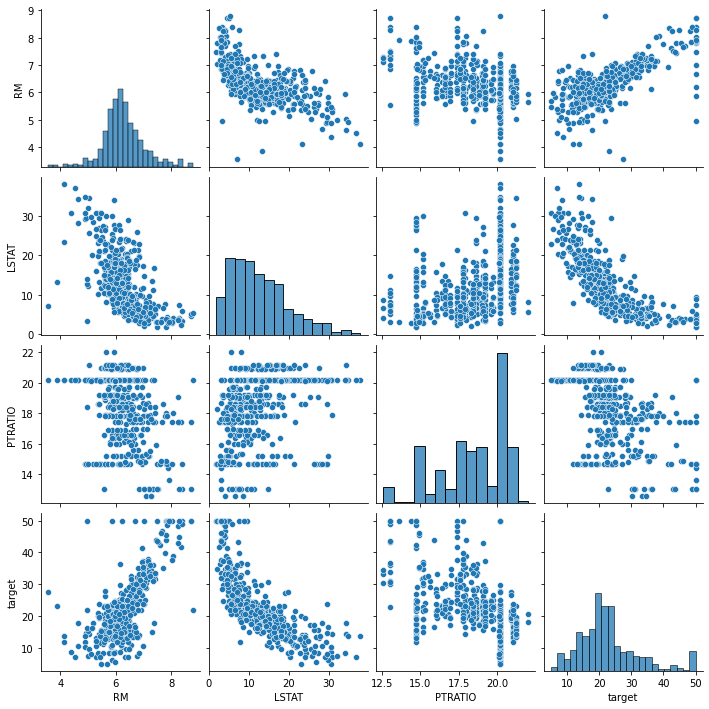

In [53]:
import seaborn as sns
sns.pairplot(df[['RM','LSTAT','PTRATIO','target']])

In [54]:
# underfitting 
#model not able to recognize the pattern 
#overfitting 
#model will do in the trainging but failed in testing
#best fit
#model recognizing pattern and giving good performance in traing and testing

In [56]:
experience = [0,1,2,3,4,5,6,7,8]
salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


In [58]:
df.shape

(9, 2)

In [60]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   experience  9 non-null      int64
 1   salary      9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [65]:
X=df[['experience']]
y = df['salary']

In [67]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("training score",model.score(X_train,y_train)*100)

training score 79.9249859786876


In [71]:
print("testing score",model.score(X_test,y_test)*100)

testing score -466.47551020408207


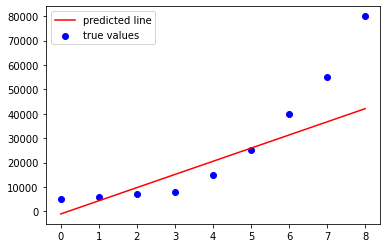

In [76]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['experience'],df['salary'],c='blue' , label='true values')
plt.plot(df['experience'],model.predict(X),c='red',label='predicted line')
plt.legend()
plt.show()

In [78]:
experience = [0,1,2,3,4,5,6,7,8]
salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


In [80]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [82]:
X = df[['experience']]
y = df['salary']

In [84]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [89]:
# import the polynomail features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)


In [91]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
print("training score",model.score(X_poly_train,y_train)*100)

training score 98.77079828005235


In [98]:
print("training score",model.score(X_poly_test,y_test)*100)

training score 87.91836734693871


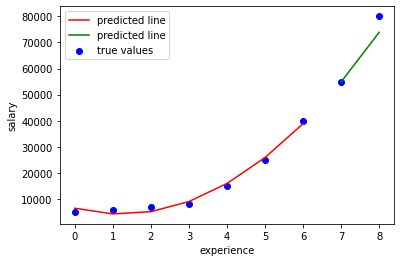

In [101]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['experience'],df['salary'],c='blue' , label='true values')
plt.plot(X_train['experience'],model.predict(X_poly_train),c='red',label='predicted line')
plt.plot(X_test['experience'],model.predict(X_poly_test ),c='green',label='predicted line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()